# Yantra: Credit Card Fraud Detection 
- In this project, we'll work with fraud detection using a Kaggle dataset that contains transactions made by credit cards in September 2013 by European Cardholders.
- This data presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. Therefore, it is highly unbalanced dataset as the positive class (Frauds) account for 0.172% of all transactions.
- Also, it contains only numerical input variables which are the result of a PCA(Principal Component Analysis) transformation.
- The only features which have not been transformed with PCA are `Time` and `Amount`. Feature `Class` is the responsive variable and it takes value `1` in case of fraud and `0` in case of valid transactions.

## Goal of this project
- The main goal of this project is to create a machine learning models that efficiently identify credit card frauds based on the data we have and then implement that model in simple tier 3 application.

## Tools used for model training
- `Jupyter-Lab`
- Alternative tools: `Google Collab`, `DeepNote`

## Steps, we must follows:
- Exploratory Data Analysis
- Data Preparation
- Train, Test and Export the model

# Exploratory Data Analysis
We'll begin by importing:
- `pandas`: For data manipulation
- `numpy`: For general manipulation of numbers and arrays
- `matplotlib` and `seaborn`: For data visualization
- `pickle`: For model exportion
- `sklearn`: For train, testing and implementing data
- `RandomUnderSampler` and `RandomOverSampler`: For balancing dataset

## Setup for project:
- Install package mentioned above using `pip`
- Example:
  ```
  pip install pandas
  ```

In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Configuring the notebook
sns.set()
%matplotlib inline

In [2]:
# Reading the csv file downloaded from Kaggle
# Remember to change the path according to your use case
credit_card = pd.read_csv('creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- In above code, `read_csv()` reads csv file from our local machine and return result into `credit_card` var and `head()` displays first 5 rows including the <b>table headers</b>.

- Now, let's use `info()` method to know more about the data we' re using for model training.

In [3]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can confirm that:
- There are total 284,807 rows and 31 Columns. 
- Among 31 Features(Columns), only feature `Class` is `int64` data types as it has value of `0` and `1` only while the remaining are `float64`.
- Also `Time` and `Amount` are only two features that have not been transformed by PCA(Principal Component Analysis).

Now, Let's dig into `Time` and `Amount` for more information.

In [4]:
credit_card[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


- Both these columns contains a wide range of values, going from zero to dozen of thousands. The values seem to be better distributed in the `Time` columns.
- Now, let's plot these both features(columns) into histograms considering the `Class` cloumn which represent the frauds:

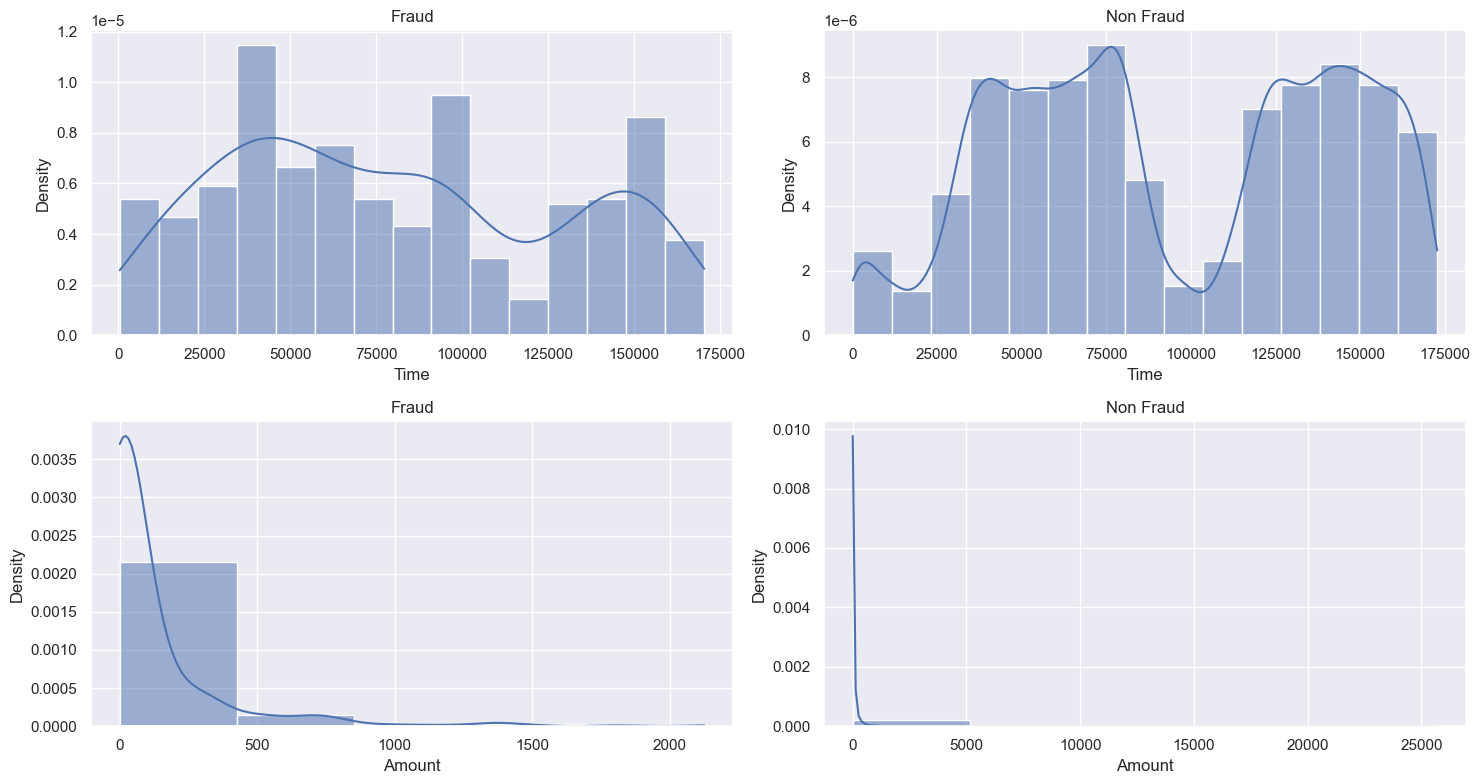

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
sns.histplot(credit_card['Time'][credit_card['Class'] == 1], bins=15, ax=ax1, kde=True, stat="density")
sns.histplot(credit_card['Time'][credit_card['Class'] == 0], bins=15, ax=ax2, kde=True, stat="density")

sns.histplot(credit_card['Amount'][credit_card['Class'] == 1], bins=5, ax=ax3, kde=True, stat="density")
sns.histplot(credit_card['Amount'][credit_card['Class'] == 0], bins=5, ax=ax4, kde=True, stat="density")

ax1.set_title('Fraud')
ax2.set_title('Non Fraud')
ax3.set_title('Fraud')
ax4.set_title('Non Fraud')
plt.tight_layout()
plt.show()

- We can now confirm that the `Amount` column is better distributed than the `Time` column.

- We'll now see the boxplots for the `Amount` column considering fraud and non-fraud.

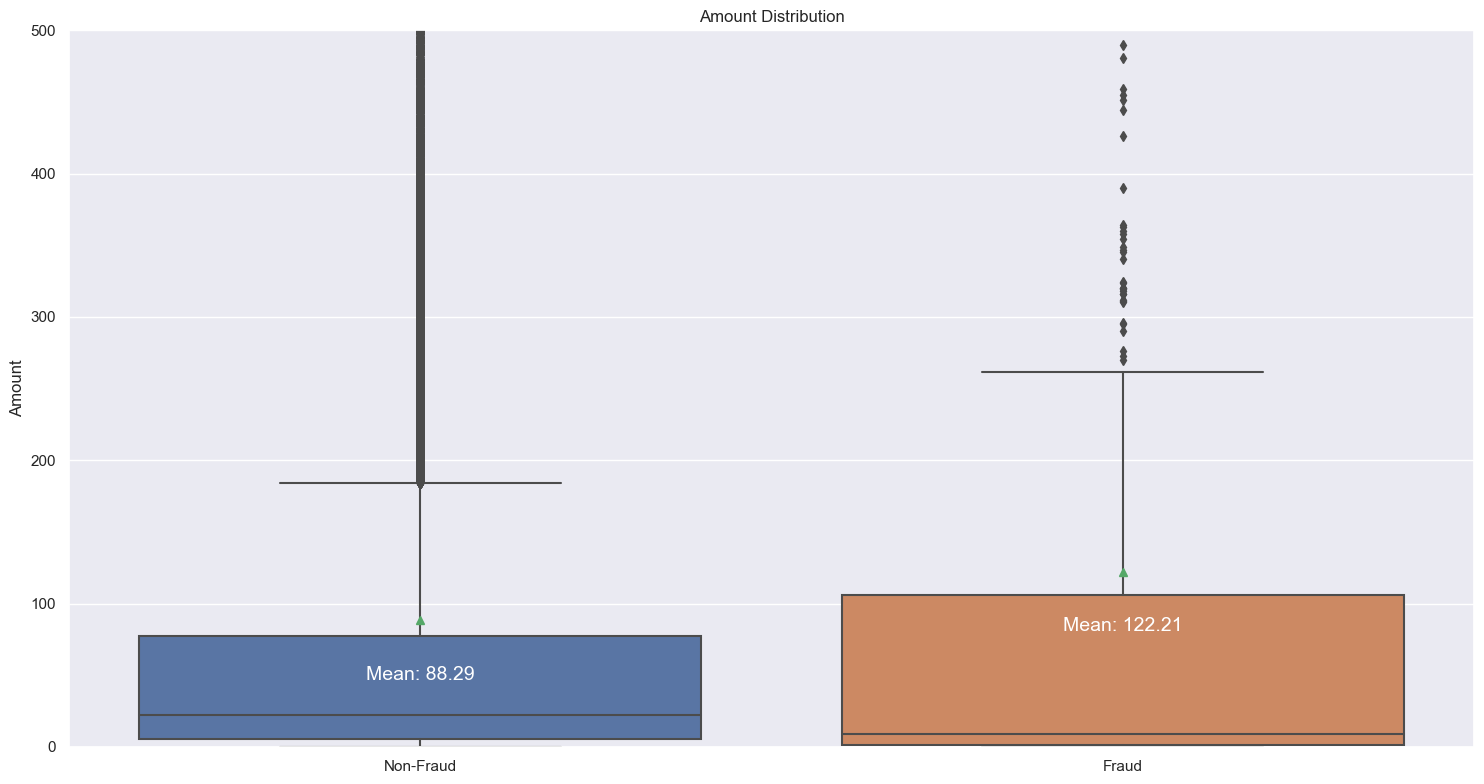

In [6]:
fig, ax = plt.subplots(figsize=(15,8))

box_plot = sns.boxplot(x=credit_card['Class'], y=credit_card['Amount'], showmeans=True, ax=ax)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
ax.set_ylim(0, 500)
ax.set_title('Amount Distribution')
ax.set_xlabel('')

means = credit_card.groupby(['Class'])['Amount'].mean()
vertical_offset = credit_card['Amount'].mean() - 130 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick] + vertical_offset, f'Mean: {round(means[xtick], 2)}', 
            horizontalalignment='center', fontsize=14, color='w')

plt.tight_layout()
plt.show()

- The mean is considerably higher when there is a fraud. Also, there are plenty of outliers in both scenarios.

- We'll now create a correlation heatmap for all the variables in the dataset.

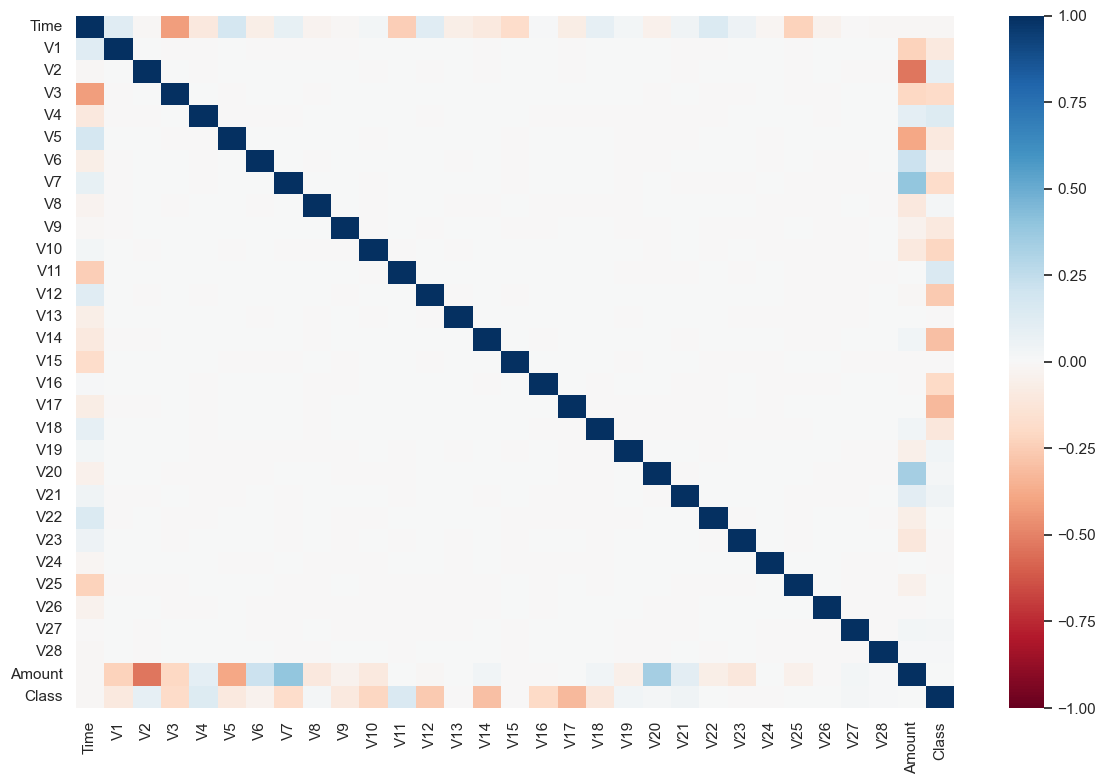

In [8]:
corr = credit_card.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, cmap='RdBu', vmin=-1)

plt.tight_layout()
plt.show()

We cannot see much correlation between the variables.

# DataSet Preparation
We already know that used dataset is not balanced. Before balancing the dataset, let's have a look in `subplot`.

We also need to:
- Transform the `Time` and `Amount` columns into Standard form.
- Split the dataset into `train` and `test`.

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


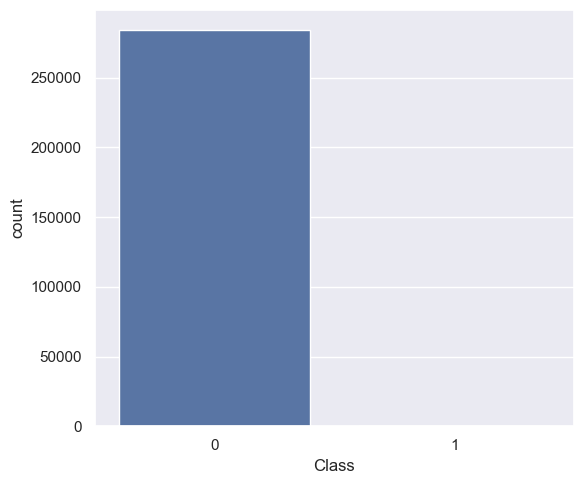

In [9]:
print(credit_card['Class'].value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(x='Class', data=credit_card)

plt.tight_layout()
plt.show()

- We can see a disproportionate ratio of observations in each class, which is not good for machine learning models' accuracy.

- But before we balance the dataset, let's first transform the `Time` and `Amount` columns using the StandardScaler class.

In [10]:
scaler = StandardScaler()

credit_card['std_amount'] = scaler.fit_transform(credit_card['Amount'].values.reshape(-1, 1))
credit_card['std_time'] = scaler.fit_transform(credit_card['Time'].values.reshape(-1, 1))

credit_card.drop(['Amount', 'Time'], axis=1, inplace=True)

credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


- In above code, we transform `Time` and `Amount` into Standard form using `StandardScaler()`.
- Save the value into new Features(Columns) and delete old `Time` and `Amount` Features(Columns).
- We can view new dataset data types using `info()`.

In [11]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   V1          284807 non-null  float64
 1   V2          284807 non-null  float64
 2   V3          284807 non-null  float64
 3   V4          284807 non-null  float64
 4   V5          284807 non-null  float64
 5   V6          284807 non-null  float64
 6   V7          284807 non-null  float64
 7   V8          284807 non-null  float64
 8   V9          284807 non-null  float64
 9   V10         284807 non-null  float64
 10  V11         284807 non-null  float64
 11  V12         284807 non-null  float64
 12  V13         284807 non-null  float64
 13  V14         284807 non-null  float64
 14  V15         284807 non-null  float64
 15  V16         284807 non-null  float64
 16  V17         284807 non-null  float64
 17  V18         284807 non-null  float64
 18  V19         284807 non-null  float64
 19  V2

- From above output, we can confirm that newly generated Features(Columns) are same type as of previous Features `Time` and `Amount`.
- Now, we can split the dataset feature using `train_test_split`.

In [12]:
X = credit_card.drop('Class', axis=1)
Y = credit_card['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

- From above code, we have splitted data into train and test.
- `70%` of data will be used to train the model and `30%` of data will be used to test the model accuracy and other metrics.
- Also, `X` contains all the Features excluding `Class` while `Y` contain only `Class` Column.

We will used to method to balance dataset. They are:
- Random Under Sampling
- Random Over Sampling

### Random Under Sampling
- At first, let's use <b>Random Under Sampling</b> method.

Class
0    0.5
1    0.5
Name: proportion, dtype: float64


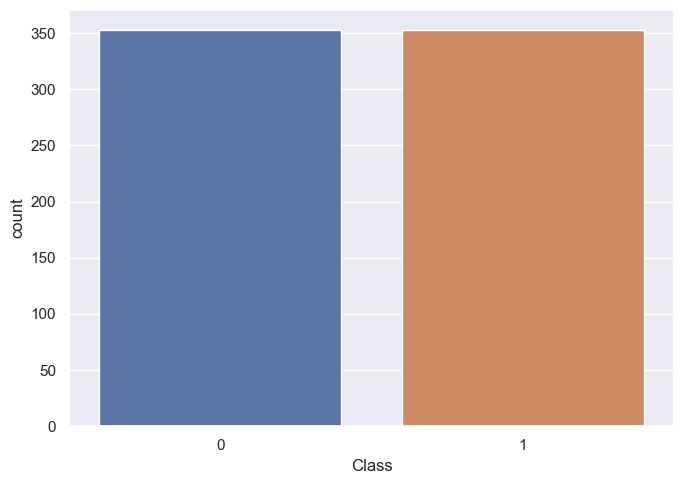

In [13]:
rus = RandomUnderSampler()
X_rus, Y_rus = rus.fit_resample(X_train, Y_train)

print(pd.Series(Y_rus).value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x=Y_rus)

plt.tight_layout()
plt.show()

### Random Over Sampling
- At second, let's use <b>Random Over Sampling</b> method.

Class
0    0.5
1    0.5
Name: proportion, dtype: float64


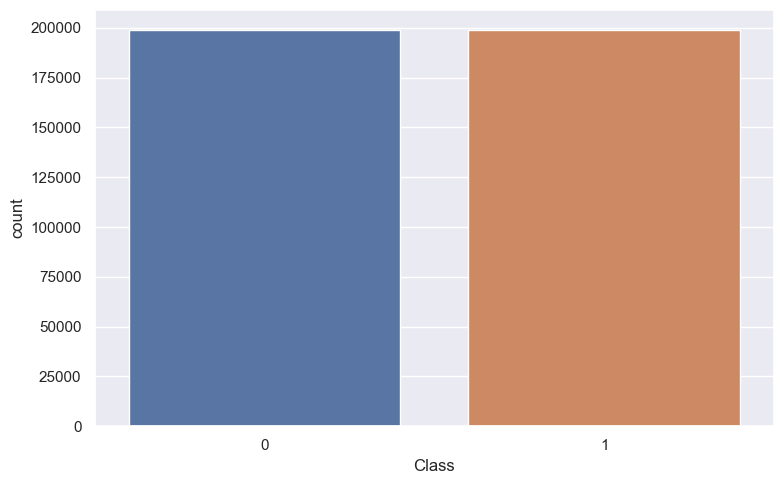

In [14]:
ros = RandomOverSampler()
X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

print(pd.Series(Y_ros).value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x=Y_ros)

plt.tight_layout()
plt.show()

- In above both output, we can see that the Class `0` and `1` are equal in ratio. So it can say they are balanced dataset.
- Take a look at new dataset

# Train, Test and Export the model
- Let's list all the metrics which will be used to evaluate the models.
- They are:
  - <b>Metrics:</b>
      - It will help to find possible results of the model.
      - They are:
          - <b>True-Positive(TP)</b>
          - <b>True-Nagative(TN)</b>
          - <b>False-Positive(FP)</b>
          - <b>False-Negative(FN)</b>
      - With this concepts, we can understand four metrics:
          - <b>Accuracy</b>
          - <b>Precision</b>
          - <b>Recall</b>
          - <b>F-1 Score</b>
   - <b>Accuracy:</b>
      - `Accuracy` is the easiest metric to understand. It shows the correct answer ratio and it is calculated diving the number of correct answers by the total number of answers:
                      $$Accuracy=\frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}$$
      - `Accuracy` does not handle unbalanced data well, and that's one of the reasons we balanced the dataset.     
   - <b>`Precision`:</b>
      - `Precision` shows the proportion of true positives, with its value ranging from zero to one.
                        $$Precision=\frac{TP}{TP+FP}$$
   - <b>`Recall`:</b>
       - `Recall` reveals the proportion of fraus identified correctly by totla number of frauds.
                $$Recall=\frac{TP}{TP+FN}$$
   - <b>`F-1 Score`:</b>
       - `F1 Score` is the harmonic mean between the Precision and the Recall. Its value range from zero to one and it is calculated with the following formula:
                 $$F1=2* \frac{precision*recall}{precision+recall}$$
   - <b>`ROC AUC Score:`</b>
       - This metric computes the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. According to Wikipedia, a ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system. It outputs a normalized value ranging from 0 to 100.
   - <b>`Confusion Matrix:`</b>
       - `Confusion Matrix` is not a metric, but table layout that allows visualization of the performance of an algorithm.
       - In the matrix, each row represents the instances in a predicted class while each column represents the instances in an actual class.
       - There will be a confusion matrix to help the evaluate of each model.
     Example of a confusion matrix:
        ![](https://miro.medium.com/max/1780/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg)

- We use <b>Logistic Regression</b> algorithm to train and test the model:
   - <b>`Logistic Regression:`</b>
       - `Logistic Regression` is a statistical model used to model a binary dependent variable.
       - The method receives this name because it uses the logistic or sigmoid function as an activation function to generate results between 0 and 1, which are understood as the probability of the event occurring and used to predict a categorical variable.
       - Below is a <b>`Sigmoid Function:`</b>
               ![alt text](http://computacaointeligente.com.br/assets/img/posts/covid-19/sigmoid.png)

## Test the Model
- Here, we will create two model. Each one for <b>`RandomUnderSampler`</b> and <b>`RandomOverSampler`</b>.
- We will fit the X_train and Y_train for model using `fit()` method.
- Then we will use model to predict the result.
- We created a `report()` method for more information.
- First one is for `RandomUnderSampler`:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85304
           1       0.05      0.93      0.09       139

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



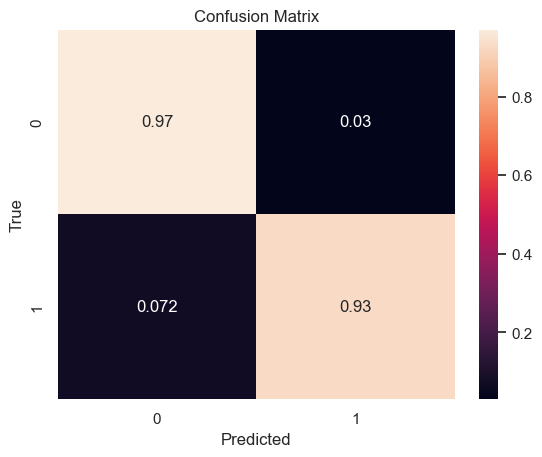

ROC AUC Score: 0.9491


In [15]:
model_under = LogisticRegression()

model_under.fit(X_rus, Y_rus)

y_pred_log_under = model_under.predict(X_test)


def report(pred):
    print(classification_report(Y_test, pred))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(Y_test, pred, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(Y_test, pred), 4)}')

report(y_pred_log_under)

- Second one is for `RandomOverSampler`:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85304
           1       0.06      0.93      0.12       139

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



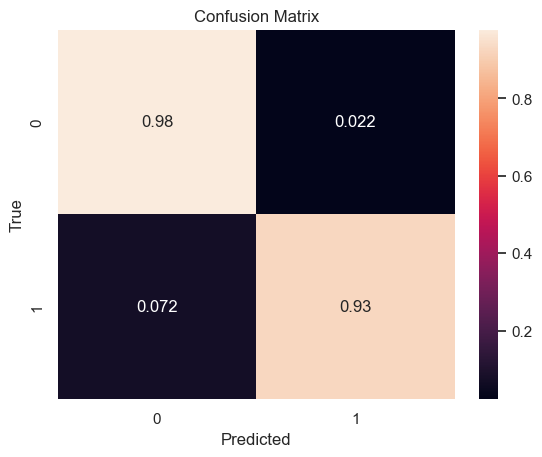

ROC AUC Score: 0.9528


In [16]:
model_over = LogisticRegression()

model_over.fit(X_ros, Y_ros)

y_pred_log_over = model_over.predict(X_test)

report(y_pred_log_over)

## Comparing The Model
- We created two model using <b>Under Sampling</b> and <b>Over Sampling</b> for <b>Logistic Regression</b>.

In [17]:
summary = pd.DataFrame(data={
'labels': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'roc_auc'],
'model_under': [accuracy_score(Y_test, y_pred_log_under), precision_score(Y_test, y_pred_log_under), recall_score(Y_test, y_pred_log_under), f1_score(Y_test, y_pred_log_under), roc_auc_score(Y_test, y_pred_log_under)],
'model_over': [accuracy_score(Y_test, y_pred_log_over), precision_score(Y_test, y_pred_log_over), recall_score(Y_test, y_pred_log_over), f1_score(Y_test, y_pred_log_over), roc_auc_score(Y_test, y_pred_log_over)]
}).set_index('labels')
summary.index.name = None

summary

,model_under,model_over
Accuracy,0.970109,0.977459
Precision,0.048260,0.063081
Recall,0.928058,0.928058
F1_score,0.091750,0.118132
roc_auc,0.949117,0.952798


- In above output, we can see the metrics' result in a tabular form.
- Now, let's plot the result in bar diagram so that it can be easily visualized.

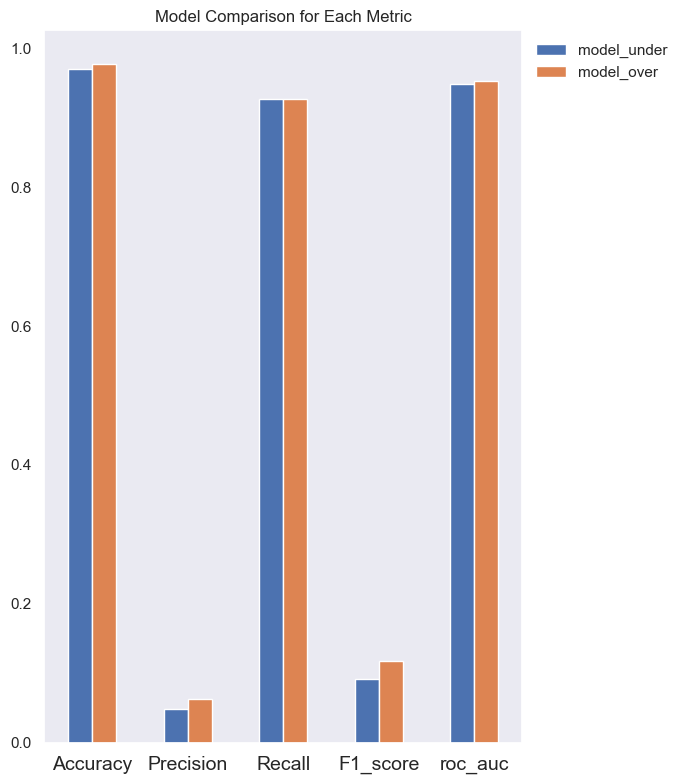

In [18]:
fig, ax = plt.subplots(figsize=(7, 8))
summary.plot.bar(ax=ax)
ax.legend(bbox_to_anchor=(1, 1), frameon=False)
ax.grid(False)
ax.set_title('Model Comparison for Each Metric')

plt.xticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()

- Analyzing above bar diagram, we can see that <b>`model_over`</b> performed well in all the metrics except in <b>Recall</b> metric.
- Since <b>`model_over`</b> is a <b>Logistic Regression</b> model which worked with dataset generated using <b>Random Over Sampler</b>.
- So it is confirmed that <b>`model_over`</b> is more accurate and best to deploy in an application.

# Train model with more DataSet

Class
0    0.5
1    0.5
Name: proportion, dtype: float64


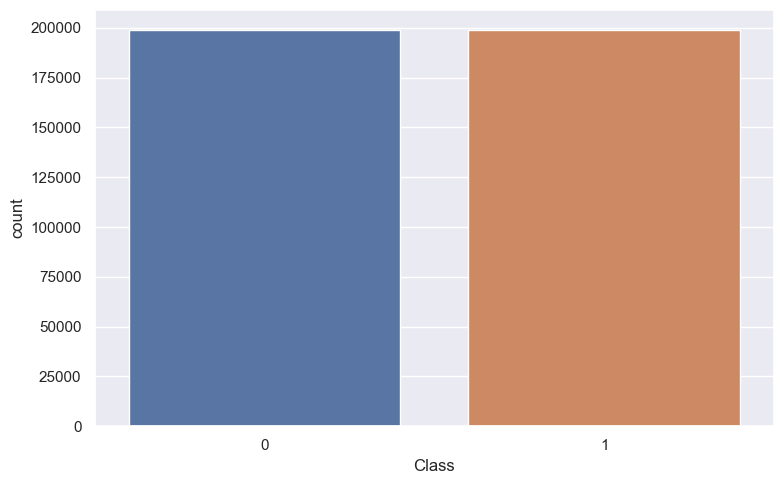

In [19]:
new_ros = RandomOverSampler()
X_new_ros, Y_new_ros = new_ros.fit_resample(X_train, Y_train)

print(pd.Series(Y_new_ros).value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x=Y_new_ros)

plt.tight_layout()
plt.show()

- We have generated dataset using Random Over Sampler previously
- Now let's validate that newly generated and old data are not same 100%.

In [20]:
# Compare the old and new feature datasets
feature_diff = X_ros != X_new_ros
feature_diff_indices = np.where(feature_diff)

# Compare the old and new target variable datasets
target_diff = Y_ros != Y_new_ros
target_diff_indices = np.where(target_diff)

if feature_diff_indices[0].size == 0 and target_diff_indices[0].size == 0:
    print("The resampled datasets are the same.")
else:
    print("The resampled datasets are different.")

print("Different indices in the feature datasets:")
print(feature_diff_indices[0])

print("\nDifferent indices in the target variable datasets:")
print(target_diff_indices[0])

The resampled datasets are different.
Different indices in the feature datasets:
[199364 199364 199364 ... 398021 398021 398021]

Different indices in the target variable datasets:
[]


- From above output, we can comform that new dataset contains new data. So we are good to use this new dataset.

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85293
           1       0.06      0.94      0.11       150

    accuracy                           0.97     85443
   macro avg       0.53      0.96      0.55     85443
weighted avg       1.00      0.97      0.99     85443



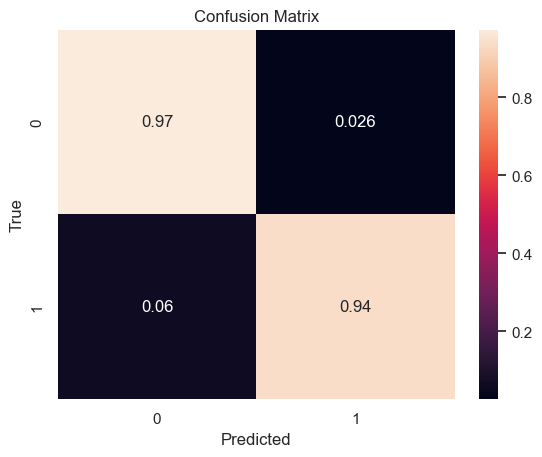

ROC AUC Score: 0.9569


In [20]:
model_over.fit(X_new_ros, Y_new_ros)

y_pred_log_over = model_over.predict(X_test)

report(y_pred_log_over)

# Export model to be deployed in an application
- Here, we will export our `model_over` using a python built-in package called `pickle`.
- We can use `dump()` method to export the trained model into our local machine.
- The dumped model can be deployed using `load()` in an application for detecting fraudulent or normal transactions in a dataset.

In [22]:
import pickle

pickle.dump(model_over,open('model.pkl', 'wb'))
# validate model.pkl file is generated in your project folder.

# Generate DataSet to be used for Demo Purpose
- Here we will generate complete new random dataset.
- We will remove Feature `Class` from the dataset.
- Then we will generate report in it and print the class value as `0` or `1`.

In [23]:
# Generating dataset For Demo Purpose
demo_rus = RandomUnderSampler(random_state=42)
X_demo_rus, Y_demo_rus = demo_rus.fit_resample(X_train, Y_train)

# Create a DataFrame with the resampled feature data
df_features = pd.DataFrame(X_demo_rus, columns=X_train.columns)

# Save the DataFrame as a CSV file
df_features.to_csv('demo.csv', index=False)

In [24]:
demo_model = pickle.load(open('model.pkl', 'rb'))

In [25]:
demo_test = pd.read_csv('demo.csv')
demo_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   V1          684 non-null    float64
 1   V2          684 non-null    float64
 2   V3          684 non-null    float64
 3   V4          684 non-null    float64
 4   V5          684 non-null    float64
 5   V6          684 non-null    float64
 6   V7          684 non-null    float64
 7   V8          684 non-null    float64
 8   V9          684 non-null    float64
 9   V10         684 non-null    float64
 10  V11         684 non-null    float64
 11  V12         684 non-null    float64
 12  V13         684 non-null    float64
 13  V14         684 non-null    float64
 14  V15         684 non-null    float64
 15  V16         684 non-null    float64
 16  V17         684 non-null    float64
 17  V18         684 non-null    float64
 18  V19         684 non-null    float64
 19  V20         684 non-null    f

In [28]:
model_pred = demo_model.predict(demo_test)
print(model_pred)

# Get the value counts of the predicted class values
value_counts = pd.Series(model_pred).value_counts()
# Display the total counts of each predicted class
print("Total Counts:")
print(value_counts)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 